In [15]:
# import needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
import warnings
warnings.filterwarnings('ignore')

# import the datasets using pandas
orders_data = pd.read_csv("orders_2016-2020_Dataset.csv")
review_dataset = pd.read_csv("review_dataset.csv")

In [2]:
def task_1():
    # considering review dataset
    df = review_dataset.copy()

    # Code to remove the text in the stars column
    da=df['stars'].str.replace(' star rating','')
    df['stars']=da

    # Code to fill null values in stars and status column
    df['status'].fillna('Not Reviewed',inplace=True)
    df['stars'].fillna(0,inplace=True)

    # converting str in stars column to int
    da=[]
    for ele in df['stars']:
        ele=round(float(ele))
        da.append(ele)
    df['stars']=da

    # To get the counts of the column status
    y_status_count = df.status.value_counts()
    # To get the counts of the column stars
    y_stars_count = df.stars.value_counts()


    # Plotting Bar Chart and Pie Chart
    sns.set_style("whitegrid")
    plt.figure(figsize=(14,10))

    # For No. of customers reviewed
    plt.subplot(2,2,1)
    plt.ylabel("Customers",fontsize=14)
    plt.xlabel("")
    plt.title("Number of Reviewed and Not Reviewed Customers",fontsize=20)
    plt.xticks([10,10.15],['Reviewed','Not Reviewed'])

    ## Bar Plot
    plt.bar(10,y_status_count.values[1],color='blue',width=0.1,label='Reviewed',edgecolor='black')
    plt.bar(10.15,y_status_count.values[0],color='orange',width=0.1,label='Not Reviewed',edgecolor='black')
    plt.legend()

    ## Pie Chart
    plt.subplot(2,2,2)
    labels = ['Reviewed','Not Reviewed']
    data = [606,1255]

    # Creating pie chart
    wedges, texts, autotexts = plt.pie(data,
                                      autopct ='%1.1f%%',
                                      explode = (0.0,0.1),
                                      labels = labels,
                                      shadow = True,
                                      colors = ("orange", "cyan"),
                                      startangle = 0,
                                      wedgeprops = { 'linewidth' : 1, 'edgecolor' : "black" },
                                      textprops = dict(color ="black"))
    # Adding legend
    plt.legend(wedges, labels,
              title ="Customers",
              loc ="center left",
              bbox_to_anchor =(1, 0, 0.5, 1))
    plt.setp(autotexts, size = 11, weight ="bold") 

    ## Bar Plot for the ratings given by customers
    plt.subplot(2,2,3)
    plt.xlabel("Rating",fontsize=14)
    plt.ylabel("Customers",fontsize=14)
    plt.title("Ratings given by Reviewed customers",fontsize=20)
    plt.xticks([10,10.05,10.10,10.15,10.20],['5','4','3','2','1'])

    ## Creating Bar Plot
    plt.bar(10,y_stars_count.values[1],color='blue',width=0.05,label='5',edgecolor='black')
    plt.bar(10.05,y_stars_count.values[2],color='orange',width=0.05,label='4',edgecolor='black')
    plt.bar(10.10,y_stars_count.values[3],color='red',width=0.05,label='3',edgecolor='black')
    plt.bar(10.15,y_stars_count.values[4],color='pink',width=0.05,label='2',edgecolor='black')
    plt.bar(10.20,0,color='green',width=0.05,label='1',edgecolor='black')

    plt.legend()

    import os
    filename = "Review_Analysis.pdf"
    plt.savefig(filename,format="pdf",bbox_inches='tight')
    print("File has been saved at "+os.getcwd()+" named "+filename)
    plt.show()

In [3]:
def task_2():
    # considering the orders dataset
    d3 = orders_data.copy()
    d1=d3['Payment Method'].dropna()

    # Code to get no. of customers using offline payment method
    offline_count=0
    for ele in d1:
        if ele[0]=='O':
            offline_count+=1

    # No. of customers using online payment method
    online_count=len(d1)-offline_count

    # Plotting Pie Chart for payment methods used
    sns.set_style("whitegrid")
    plt.figure(figsize=(12,7))

    ## Pie Chart
    plt.subplot(1,1,1)
    labels = ["Offline Method", "Online Method"]
    data = [offline_count,online_count]

    # Creating pie chart
    wedges, texts, autotexts = plt.pie(data,
                                      autopct ='%1.1f%%',
                                      explode = (0.0,0.1),
                                      shadow = False,
                                      colors = ("orange", "cyan"),
                                      startangle = 0,
                                      wedgeprops = { 'linewidth' : 1, 'edgecolor' : "black" },
                                      textprops = dict(color ="black"))
    # Adding legend
    plt.legend(wedges, labels,
              loc ="center left",
              bbox_to_anchor =(1, 0, 0.5, 1),fontsize=15)
    plt.setp(autotexts, size = 14, weight ="bold") 
    plt.title("Most Payment Methods used by the customers",fontsize=20)


    filename = "Different Payment Methods.pdf"
    plt.savefig(filename,format="pdf",bbox_inches='tight')
    print("File has been saved at "+os.getcwd()+" named "+filename)
    plt.show()

In [4]:
def task_3():
    # considering the orders dataset
    d1 = orders_data.copy()
    
    # Fill the null values of column Shipping State
    d1['Shipping State'].fillna(0,inplace=True)

    # store total values of orders from different states in y
    y = d1['Shipping State'].value_counts().values[:14]

    # Plotting Pie Chart ro see top consumer states of india
    sns.set_style("whitegrid")
    plt.figure(figsize=(12,8))

    ## Pie Chart
    labels = ["Tamilnadu","Maharashtra",  "Uttar Pradesh", "Karnataka", 
              "Andaman and Nicobar Islands","Andhra Pradesh", "Telangana", 
              "West Bengal", "Bihar", "Madhya Pradesh", "Gujarat", "Delhi",
              "Rajasthan", "Haryana"]

    data = y

    # Creating pie chart
    wedges, texts, autotexts = plt.pie(data,
                                      autopct ='%1.1f%%',
                                      labels = labels,
                                      shadow = False,
                                      startangle = 0,
                                      wedgeprops = { 'linewidth' : 1, 'edgecolor' : "black" },
                                      textprops = dict(color ="black"))
    # Adding legend
    plt.legend(wedges, labels,
              loc ="center left",
              bbox_to_anchor =(1.1, 0, 0.5, 1),fontsize=13)
    plt.setp(autotexts, size = 10, weight ="bold")
    plt.title("Top Consumer States in India",fontsize=20)


    filename = "Top Consumer States in India.pdf"
    plt.savefig(filename,format="pdf",bbox_inches='tight')
    print("File has been saved at "+os.getcwd()+" named "+filename)
    plt.show()

In [5]:
def task_4():
    #considering the orders dataset
    d1 = orders_data.copy()

    # Fill the null values of column Shipping city
    d1['Shipping City'].fillna(0,inplace=True)

    # Plotting the bar plot
    sns.set_style("whitegrid")
    plt.figure(figsize=(14,8))

    # Plot horizontal bar chart
    x = d1['Shipping City'].value_counts().index[:20]
    y = d1['Shipping City'].value_counts().values[:20]
    sns.barplot(x=y, y=x)
    plt.title("Top Consumer Cities of India",fontsize=20)

    filename = "Top Consumer Cities in India.pdf"
    plt.savefig(filename,format="pdf",bbox_inches='tight')
    print("File has been saved at "+os.getcwd()+" named "+filename)
    plt.show()

In [6]:
def task_5():
    # considering the review dataset
    d2 = review_dataset.copy()

    # Plotting the bar plot and pie chart
    sns.set_style("whitegrid")
    plt.figure(figsize=(22,18))

    # Plot horizontal bar chart
    x = d2['category'].value_counts().index
    y = d2['category'].value_counts().values
    sns.barplot(x=y, y=x)
    plt.title("Top Selling Product Categories",fontsize=30)

    filename = "Top Selling Product Categories.pdf"
    plt.savefig(filename,format="pdf",bbox_inches='tight')
    print("File has been saved at "+os.getcwd()+" named "+filename)
    plt.show()

In [7]:
def task_6():
    # considering the review dataset
    d3 = review_dataset.copy()
    d4 = d3.dropna()

    # store values and index of category column counts in y1 and y2 respectively
    y1=d4['category'].value_counts().values
    y2=d4['category'].value_counts().index

    da = d4['stars'].str.replace(' star rating','')
    d4['stars']=da

    # Removing the negative reviews
    da=[]
    for ele in d4['stars']:
        ele=round(float(ele))
        if 2<=ele<=3:
            ele='hello'
        da.append(ele)
    d4['stars']=da

    # convert the column stars so that null values rows are dropped
    d4['stars'] = d4['stars'].apply(pd.to_numeric, errors='coerce')

    d4=d4.dropna()

    # store values and index of new category column counts in y3 and y4 respectively
    y3=d4['category'].value_counts().values
    y4=d4['category'].value_counts().index

    # Bar Plot of reviews of all product categories
    plt.figure(figsize=(22,18))

    p1=plt.barh(y2,y1,color='grey')
    p2=plt.barh(y4,y3,color='orange')
    plt.title('Reviews of All Product Categories',fontsize=30)
    plt.ylabel('Product Category',fontsize=20)
    plt.xlabel('Reviews',fontsize=20)
    plt.legend((p1[0],p2[0]),('Total Reviews','Positive Reviews'),fontsize=20)

    import os
    filename = "Reviews of All Product Categories.pdf"
    plt.savefig(filename,format="pdf",bbox_inches='tight')
    print("File has been saved at "+os.getcwd()+" named "+filename)
    plt.show()

In [8]:
def task_7():    
    df = orders_data.copy()

    df['Order Date and Time Stamp'] = pd.to_datetime(df['Order Date and Time Stamp'], utc=True)

    d1=pd.DataFrame()
    d1['date']=list(df['Order Date and Time Stamp'])
    d1=d1.dropna()
    d1=d1.sort_values(by=['date'])

    d1['date'] = pd.to_datetime(d1['date'], utc=True)

    d1['month']=list(d1.date.apply(lambda x:x.strftime('%b-%y')))
    
    # Plotting
    plt.figure(figsize=(35,20))
    
    # Plot of number of orders per month
    plt.subplot(2,1,1)
    g=sns.countplot(x=d1.month,data=d1,edgecolor='black')
    plt.xlabel('Month',fontsize=20)
    plt.title('Number of Orders per month',fontsize=30)

    d1 = orders_data.copy()

    d1['Order Date and Time Stamp'] = pd.to_datetime(d1['Order Date and Time Stamp'], utc=True)

    d1.dropna(subset=['Order #', 'Order Date and Time Stamp'])

    d1['Order Date and Time Stamp'] = d1['Order Date and Time Stamp'].apply(
            lambda x: x.replace(hour=00, minute=0, second=00))
    d1 = d1.set_index('Order Date and Time Stamp')

    z = d1.index.value_counts().sort_index(ascending=False)
    dataframe = pd.DataFrame({'date': z.index, 'order': z.values})
    dataframe = dataframe.set_index('date')

    yearly_mean = dataframe['order'].resample("YS").sum()
    
    # Plot of number of orders per year
    plt.subplot(2,1,2)
    plt.plot(yearly_mean.index.date, yearly_mean.values, marker='o',ls='-')
    plt.title("Number of Orders Per Year",fontsize=30)
    plt.xlabel('Year',fontsize=20)
    plt.xticks(rotation='horizontal')

    filename = "Number of Orders Per Month Per Year.pdf"
    plt.savefig(filename,format="pdf",bbox_inches='tight')
    print("File has been saved at "+os.getcwd()+" named "+filename)
    plt.show()

In [9]:
def task_8():
    # import the dataset values and parse the column Order Date and Time Stamp
    # Because we want to use .dt which works on datetime like values
    sales_data = pd.read_csv(r'orders_2016-2020_Dataset.csv', parse_dates=['Order Date and Time Stamp'])

    # store the values of month in sales_month and values of year in sales_year 
    sales_months = sales_data['Order Date and Time Stamp'].dt.month.tolist()
    sales_year = sales_data['Order Date and Time Stamp'].dt.year.tolist()

    # store the counts of months in y1 and index of counts of years in y2
    y1 = sales_data['Order Date and Time Stamp'].dt.month.value_counts()
    y2 = sales_data['Order Date and Time Stamp'].dt.year.value_counts().index.tolist()

    # make months list so that we have labels for the plots
    months = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]

    sns.set_style("whitegrid")
    plt.figure(figsize=(10,20))

    for i in range(len(y2)):
        da=[]
        for j in range(0,2297):
            if y2[i]==sales_year[j]:
                da.append(sales_months[j])
        list_data=[]
        jan = 0
        feb = 0
        mar = 0
        apr = 0
        may = 0
        jun = 0
        jul = 0
        aug = 0
        sept = 0
        oct = 0
        nov = 0
        dec = 0

        for ele in da:
            if ele==1:
                jan+=1
            if ele==2:
                feb+=1
            if ele==3:
                mar+=1
            if ele==4:
                apr+=1
            if ele==5:
                may+=1
            if ele==6:
                jun+=1
            if ele==7:
                jul+=1
            if ele==8:
                aug+=1
            if ele==9:
                sept+=1
            if ele==10:
                oct+=1
            if ele==11:
                nov+=1
            if ele==12:
                dec+=1
        list_data=[jan,feb,mar,apr,may,jun,jul,aug,sept,oct,nov,dec]
        plt.subplot(5,1,i+1)
        plt.plot(months, list_data, marker='o')
        plt.title('Monthwise orders in '+str(y2[i]))
        plt.ylabel("Number of Orders")

    filename = "Reviews for number of orders per month per year.pdf"
    plt.savefig(filename,format="pdf",bbox_inches='tight')
    print("File has been saved at "+os.getcwd()+" named "+filename)
    plt.show()

In [10]:
def task_9():
    df=orders_data.copy()

    df['Order Date and Time Stamp']=pd.to_datetime(df['Order Date and Time Stamp'])

    df['order_purchase_hour']=df['Order Date and Time Stamp'].apply(lambda x:x.hour)
    hours_bins=[0,4,8,12,16,20,24]
    hours_labels=['Late Night','Early Morning','Morning','Noon','Eve','Night']
    df['Parts of a Day']=pd.cut(df['order_purchase_hour'],hours_bins,labels=hours_labels)

    # Bar Plot for orders for parts of day 
    plt.figure(figsize=(22,10))
    g=sns.countplot(x='Parts of a Day',data=df,edgecolor='black')
    g.set_xticklabels(g.get_xticklabels(),rotation=0,fontsize=20)
    for p in g.patches:
        g.annotate(format(p.get_height()),(p.get_x()+0.30,p.get_height()+0.50),fontsize=20)
    plt.title("Number of Orders Across Parts of a Day",fontsize=25)
    
    filename = "Number of Orders Across Parts of a Day.pdf"
    plt.savefig(filename,format="pdf",bbox_inches='tight')
    print("File has been saved at "+os.getcwd()+" named "+filename)
    plt.show()

Enter 1 to see the analysis of Reviews given by Customers
Enter 2 to see the analysis of different payment methods used by the Customers
Enter 3 to see the analysis of Top Consumer States of India
Enter 4 to see the analysis of Top Consumer Cities of India 
Enter 5 to see the analysis of Top Selling Product Categories
Enter 6 to see the analysis of Reviews for All Product Categories
Enter 7 to see the analysis of Number of Orders Per Month Per Year
Enter 8 to see the analysis of Reviews for Number of Orders Per Month Per Year
Enter 9 to see the analysis of Number of Orders Across Parts of a Day
Enter 10 to see the Full Report
1
File has been saved at E:\Data Science Internship\EDA_Task named Review_Analysis.pdf


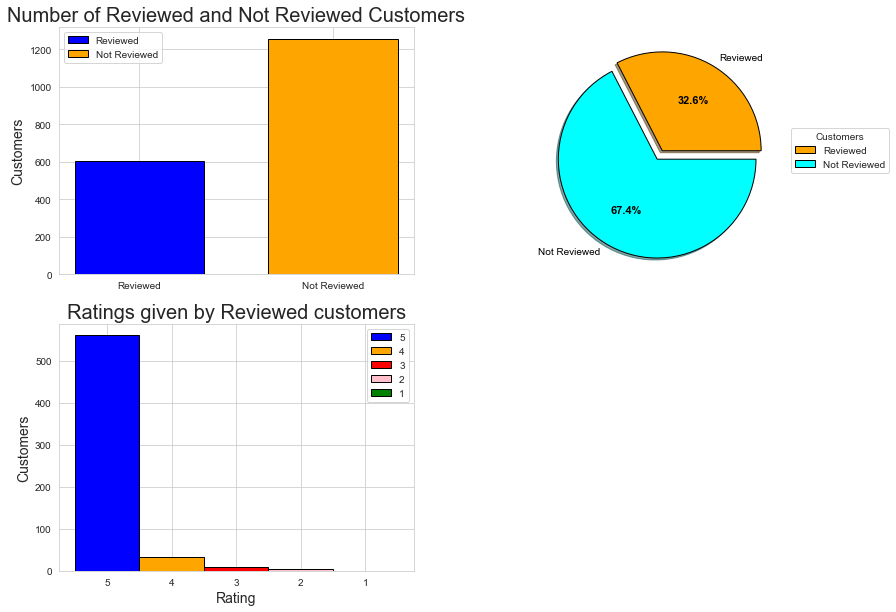

Press Q to Quit and any other key to continue: q


SystemExit: 0

In [16]:
def input_options():
    global num
    print('Enter 1 to see the analysis of Reviews given by Customers\n'
          'Enter 2 to see the analysis of different payment methods used by the Customers\n'
          'Enter 3 to see the analysis of Top Consumer States of India\n'
          'Enter 4 to see the analysis of Top Consumer Cities of India \n'
          'Enter 5 to see the analysis of Top Selling Product Categories\n'
          'Enter 6 to see the analysis of Reviews for All Product Categories\n'
          'Enter 7 to see the analysis of Number of Orders Per Month Per Year\n'
          'Enter 8 to see the analysis of Reviews for Number of Orders Per Month Per Year\n'
          'Enter 9 to see the analysis of Number of Orders Across Parts of a Day\n'
          'Enter 10 to see the Full Report')
    num = int(input())
    return num

analysis()
def analysis():
    num = input_options()
    if num == 1:
        task_1()
    elif num == 2:
        task_2()
    elif num == 3:
        task_3()
    elif num == 4:
        task_4()
    elif num == 5:
        task_5()
    elif num == 6:
        task_6()
    elif num == 7:
        task_7()
    elif num == 8:
        task_8()
    elif num == 9:
        task_9()
    elif num == 10:
        task_1()
        task_2()
        task_3()
        task_4()
        task_5()
        task_6()
        task_7()
        task_8()
        task_9()
        
    choice = input('Press Q to Quit and any other key to continue: ')
    if choice.lower()=="q":
        sys.exit(0)
    else:
        analysis()